In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objects import Layout

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from IPython.display import HTML as html_print

from datetime import datetime

This is the color palette of this notebook


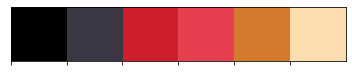

In [2]:
colors = ["black", '#3b3745', '#cf1d2a', '#e63f50', '#d5792c', '#FCDDB0']
print("This is the color palette of this notebook")
sns.palplot(sns.color_palette(colors))

In [3]:
# Print Information
def cprint(title, text, color='#e63e50'):
    text = "<strong style=color:{}>{}:</strong><br>".format(color, title) + \
            "<text>{}</text>".format(text)
    return html_print(text)

# Hatching Plot
def hatching_plot(df, x, y, color, pattern, pattern_shape, title):
    fig = px.bar(df, x=x, y=y, 
                       color=color, pattern_shape=pattern,
                       pattern_shape_sequence=pattern_shape)
    fig.update_yaxes(showgrid=False, visible=False)
    fig.update_xaxes(categoryorder='total descending')
    fig.update_traces(hovertemplate=None, texttemplate="%{y}", textfont_color='white', 
                      marker=dict(line=dict(color='#000000', width=2)),
                      marker_color = colors[3])
    fig.update_layout(margin=dict(t=80, b=100, l=90, r=60),
                            title_text=title,
                            xaxis_tickangle=360,
                            xaxis=dict(color="white"),
                            plot_bgcolor=colors[1], paper_bgcolor=colors[1],
                            title_font=dict(size=25, color='white', family="Arial"),
                            font=dict(color='black'),
                            legend=dict(font=dict(
                                    family="Courier",
                                    size=12,
                                color="white",
        
                            ))
                            )
    # Add image
    fig.add_layout_image(
        dict(
            source="https://i.imgur.com/2Cv9yGn.png",
            xref="paper", yref="paper",
            x= 0.3, y=0.9,
            sizex=0.6, sizey=0.6,
            opacity = 0.2,
            xanchor="left", yanchor="top"
        )
    )
    fig.show()
    
# Return the winner 
def winner(row):
    if row['result_home'] > row['result_away']:
        val = "H"
    else:
        val = "A"
    return val

# Return the winning Club
def cr7_club_result(row):
    if row['Venue'] == row['winner']:
        val = "win"
    else:
        val = "lose"
    return val

def win_goal(row):
    if row['Venue'] == row['winner'] and row['at_score_home'] == row['at_score_away']:
        if row['winner'] == "H":
            if row["result_home"] == row["at_score_home"] + 1:
                save = "yes"
            else:
                save = "no"
        else:
            if row["result_away"] == row["at_score_away"] + 1:
                save = "yes"
            else:
                save = "no"
    else:
        save = "no"
    return save

In [4]:
df = pd.read_csv("CR7/data.csv")


In [5]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [6]:
cprint("The dataset Columns", df.columns)

In [7]:
cprint("The size of the dataset", df.shape)


In [8]:
df.describe(include=['object']).T


,count,unique,top,freq
Season,701,21,14/15,61
Competition,701,16,LaLiga,311
Matchday,701,52,Group Stage,75
Date,701,464,09-12-15,5
Venue,701,2,H,403
Club,701,4,Real Madrid,450
Opponent,701,125,Sevilla FC,27
Result,701,53,3:00,49
Playing_Position,643,5,LW,356
Minute,701,106,90,17


In [9]:
df.isnull().sum()


Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 15
Goal_assist         242
dtype: int64

In [10]:
df.Playing_Position.unique()


array(['LW', nan, 'RW', 'CF', 'LW ', 'CF '], dtype=object)

In [11]:
# Remove space in values
df['Playing_Position'] = df['Playing_Position'].replace('LW ','LW')
df['Playing_Position'] = df['Playing_Position'].replace('CF ','CF')

In [12]:
# Correct some values in Season Column
df['Season'] = df['Season'].replace('Dec-13','12/13')

In [13]:
# Change to Datetime type
df['Date'] = pd.to_datetime(df.Date)

In [14]:
# Create some useful data for visualization
df[['result_home','result_away']] = df.Result.str.split(":", expand=True)

In [15]:
# Keep only number
df["result_away"] = df['result_away'].str.extract('(\d+)').astype(int)

# Change column type to integer
df["result_home"] = pd.to_numeric(df["result_home"])

In [16]:
df['winner'] = df.apply(winner, axis=1)
df['cr7_club_result'] = df.apply(cr7_club_result, axis=1)

In [17]:
# Create some useful data for visualization
df[['at_score_home','at_score_away']] = df.At_score.str.split(":", expand=True)

# Change to numeric columns
df["at_score_home"] = pd.to_numeric(df["at_score_home"])
df["at_score_away"] = pd.to_numeric(df["at_score_away"])


df['save'] = df.apply(win_goal, axis=1)

In [18]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,result_home,result_away,winner,cr7_club_result,at_score_home,at_score_away,save
0,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN,3,0,H,win,2,0,no
1,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge,3,0,H,win,3,0,no
2,02/03,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins,1,2,A,win,1,2,no
3,02/03,Taca de Portugal Placard,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates,4,1,H,win,3,0,no
4,02/03,Taca de Portugal Placard,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN,8,1,H,win,3,0,no


In [19]:
goals_club = df.groupby("Club").size().reset_index(name='counts')

fig = go.Figure(data=[go.Pie(labels=goals_club["Club"], values=goals_club["counts"], pull=[0, 0, 0.2])])
fig.update_traces(textposition='inside', textinfo='percent', textfont_color="white", 
                  marker=dict(colors=colors[2:], line=dict(color='white', width=2)))

# Add title 
fig.update_layout(legend=dict(font=dict(
            family="Courier",
            size=12,
            color="white",
        
        )), title_text='Goals per Clubs', 
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])

# Add image
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/3Uo2tzt.png",
        xref="paper", yref="paper",
        y=0.7,
        opacity= 0.3,
        sizex=0.7, sizey=1,
        xanchor="left", yanchor="top"
    )
)
fig.show()

In [20]:
goals_position = df.groupby("Playing_Position").size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
goals_position 

,Playing_Position,counts
1,LW,361
0,CF,203
2,RW,79


In [21]:
goals_position_club = (
    df.groupby(['Club', 'Playing_Position'], as_index=False)
      .agg(count=('Playing_Position', 'count'))
)

hatching_plot(goals_position_club, "Club", "count", "Playing_Position", "Playing_Position", [".", "x", "+"], "Position Played per Club")

In [22]:
goals_club = df.groupby("Type").size().reset_index(name='counts')

fig = go.Figure(data=[go.Pie(labels=goals_club["Type"], values=goals_club["counts"])])
fig.update_traces(textposition='inside', textinfo='percent', textfont_color="white", 
                  marker=dict(colors=colors[2:], line=dict(color='white', width=2)))

# Add title 
fig.update_layout(legend=dict(font=dict(
            family="Courier",
            size=12,
            color="white",
        
        )), title_text='Goals per Type', 
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])

# Add image
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/3Uo2tzt.png",
        xref="paper", yref="paper",
        y=0.7, x=-0.03,
        opacity= 0.3, 
        sizex=0.7, sizey=1,
        xanchor="left", yanchor="top"
    )
)
fig.show()

In [23]:
goals_season = df.groupby("Season").size().reset_index(name='counts')

fig = px.line(goals_season, x='Season', y='counts',  markers=True)
fig.update_yaxes(showgrid=False, visible=False)
fig.update_xaxes(showgrid=False)
fig.update_traces(marker=dict(line=dict(color='white', width=2)),
                  marker_color = colors[3], line_color=colors[3], 
                        line_width=5)
fig.update_layout(margin=dict(t=80, b=100, l=90, r=60),
                        title_text="Goals Per Season",
                        xaxis_tickangle=360,
                        xaxis=dict(color="white"),
                        plot_bgcolor=colors[1], paper_bgcolor=colors[1],
                        title_font=dict(size=25, color=colors[3], family="Arial"),
                        font=dict(color='black'),
                        legend=dict(font=dict(
                                family="Courier",
                                size=12,
                            color="white",
                        ))
                        )
fig.add_annotation(x="14/15", y=63,
            text="Highest Goals Count",
            showarrow=True,
            font=dict(
                family="sans serif",
                size=18,
                color=colors[4]
                    ),
           arrowcolor="white",
           arrowhead=1)
fig.show()

In [24]:
fig = px.scatter(df, x="Season", y="Minute")
fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)

fig.update_traces(marker=dict(size=8, color=colors[5]))

# Add title and change display 
fig.update_layout(plot_bgcolor="#3b3745",
                  xaxis=dict(color="white"),
                  yaxis=dict(color="white"),
                  legend=dict(font=dict(
                  family="Courier",
                  size=12,
                  color="white",)), 
                  title_text='Time of Goals', 
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])

# Make a horizontal highlight section
fig.add_hrect(y0=90, y1=123, 
              annotation_text="Last Minutes Goals",
              annotation_position="top right",  
              annotation_font_size=11,
              annotation_font_color="White",
              fillcolor=colors[3], opacity=0.25)

# Make a horizontal highlight section
fig.add_hrect(y0=0, y1=15, 
              annotation_text="Early Minutes Goals",
              annotation_position="top right",  
              annotation_font_size=11,
              annotation_font_color="White",
              fillcolor=colors[4], opacity=0.25)

# Add image
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/z6Qe9hm.png",
        xref="paper", yref="paper",
        y=0.8,
        opacity= 0.08,
        sizex=0.9, sizey=1,
        xanchor="left", yanchor="top"
    )
)
fig.show()